In [8]:
using LinearAlgebra
using Plots

In [9]:
global u₁, u₂, w;
u₁ = Vector{Float64}();
u₂ = Vector{Float64}();
w  = Vector{Float64}();

file_path = "circulo_treina"
file      = open(file_path)
for line in eachline(file)
    row   = parse.(Float64, split(line));
    push!(u₁, row[1]);
    push!(u₂, row[2]);
    push!(w , row[3]);
end

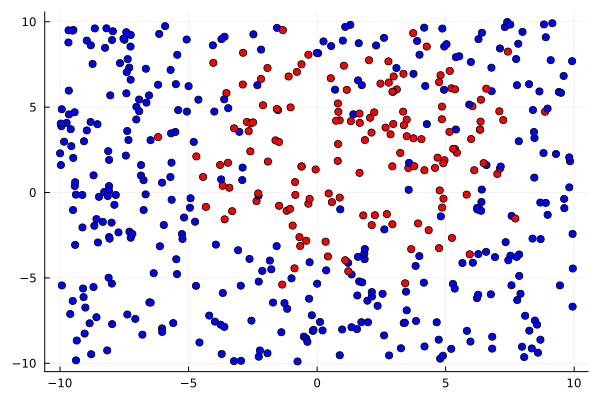

In [10]:
colors = ifelse.( w .== 1, "blue", "red");
plt    = scatter!(u₁, u₂, color = colors, legend = false);
plt

In [6]:
function circle( u::Vector{Float64}, center::Vector{Float64}, R::Float64, flag::Bool )
    x_center = center[1]; 
    y_center = center[2];
    u₁ = u[1];            
    u₂ = u[2];
    
    
    
end

circle (generic function with 1 method)